In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import *

In [3]:
import colour
colour_d50 = colour.SDS_ILLUMINANTS.get('D50')
d50 = Spectra(data=colour_d50.values / 103.003, wavelengths=colour_d50.wavelengths)

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)
trichromat = Observer.trichromat(illuminant=d50)
tetrachromat = Observer.tetrachromat(illuminant=d50)

In [5]:
tetrachromat_c = Observer.tetrachromat()

In [6]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [7]:
all_inks = {}
with open(f'Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            
            all_inks[name] = spectra

In [8]:
all_inks.keys()

dict_keys(['Bouquet dantan H', 'Rose cyclamen H', 'Bleu pervenche h', 'Violette pensee h', 'Orange D', 'Peach haze D', 'Hope pink D', 'Atlantic salmon N', 'Operation overlord orange N', 'Dragon catfish N', 'Iroshizuku purple', 'Kaweco green', 'Pilot blue', 'Last purple', 'Sailor pink', 'Platinum violet', 'Platinum Violet2', 'Think Pink', 'Robert oster ', 'Opportunity', 'Cheshire cat', 'North African violet', 'Violet lion', 'Pineider violet', 'Media beliar ', 'Purple jade rabbit', 'Inkbara danelion', 'Yellow fire', 'Sunshine yellow', 'Orange soleil', 'Noodler’s yellow', 'Inkbara yellow', 'Violet bee', 'Aurora orange', 'Momo pink', 'Rokyu moon yellow', 'Pink radish', 'Pink gazelle', 'Fairytale pink', 'Inkbara cyan', 'Pink owl', 'Bay state blue', 'Pastel pink', 'Colorberse 7 clear cyan'])

0.815647423
0.963565767
0.886444032
0.851789534
1.34718442
1.31480944
0.911312938
0.644811034


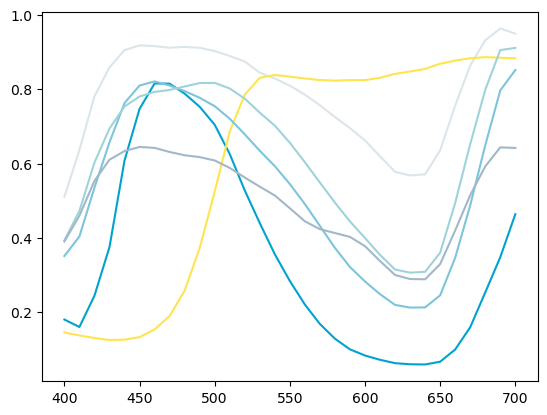

In [15]:
more_inks = {}
with open(f'011624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            print(np.max(color_data))
            try:
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                spectra.plot()
                more_inks[name] = spectra
            except ValueError:
                continue

In [10]:
more_inks

{'KWZ turquoise ': <spectra.Spectra at 0x28eaa3850>,
 'H Bleu Azur': <spectra.Spectra at 0x295586dd0>,
 'CT Pastel Yellow': <spectra.Spectra at 0x2956b6fd0>,
 'Robert Oster Australian Opal Blue': <spectra.Spectra at 0x296022750>,
 'FWP Three Steamboats': <spectra.Spectra at 0x28eae74d0>,
 'Wearingeul Alice': <spectra.Spectra at 0x2956e2650>}

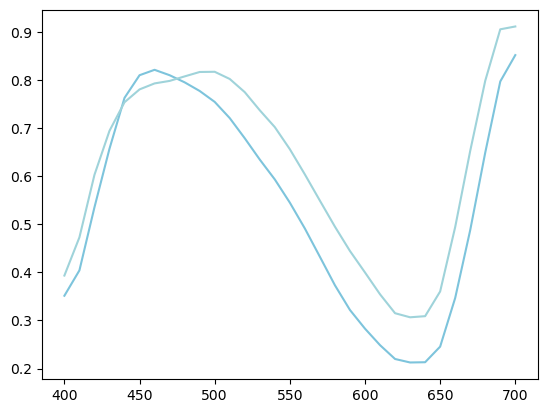

In [20]:
more_inks["Robert Oster Australian Opal Blue"].plot()
more_inks["FWP Three Steamboats"].plot()

In [18]:
for name, spectra in more_inks.items():
    c = [cppy["peach haze"], cppy["platinum violet"], cppy["operation overlord"], spectra]
    n = load_neugebauer(c, paper=cppy["paper"])
    g = InkGamut(n)
    w= g.get_width(tetrachromat, verbose=False, stepsize=0.05)
    print(name, w, (spectra).to_rgb())

[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 80812.37it/s]


KWZ turquoise  0.0285535248961 [ 0.          0.63578644  0.81759602]
[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79248.54it/s]


H Bleu Azur 0.0282483965797 [ 0.85844504  0.89894549  0.91686355]
[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 80539.55it/s]


CT Pastel Yellow 0.0135293709598 [ 1.          0.89452033  0.31499143]
[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 82245.77it/s]


Robert Oster Australian Opal Blue 0.030450645188 [ 0.49003702  0.76866303  0.86154216]
[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 81319.01it/s]


FWP Three Steamboats 0.0307000938387 [ 0.62361207  0.8290787   0.85616018]
[  5.85122107   9.47952183   9.4832544   11.58723662]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79628.96it/s]


Wearingeul Alice 0.028946658112 [ 0.63458489  0.72251647  0.78806449]


Remark that the printer whitepoint here is whiter than the illuminant. Ok. What do we do about that? Press forward for now,

In [31]:
cppy = {
    "paper": cmy_primaries_dict["000"],
    "cyan": cmy_primaries_dict["100"],
    "peach haze": all_inks["Peach haze D"],
    "opportunity": all_inks["Opportunity"],
    "platinum violet": all_inks["Platinum violet"],
    "operation overlord": all_inks["Operation overlord orange N"],
}

In [32]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

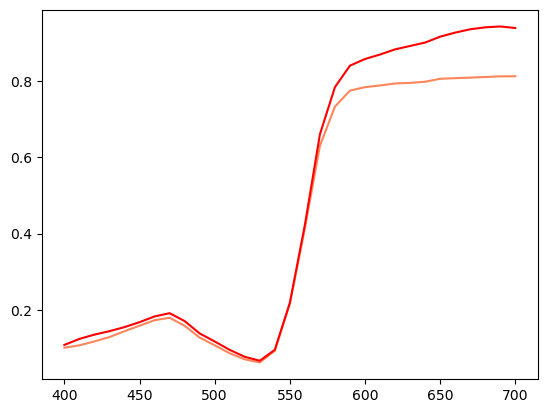

In [36]:
cppy["peach haze"].plot()
cijk["0200"].plot(color='red')

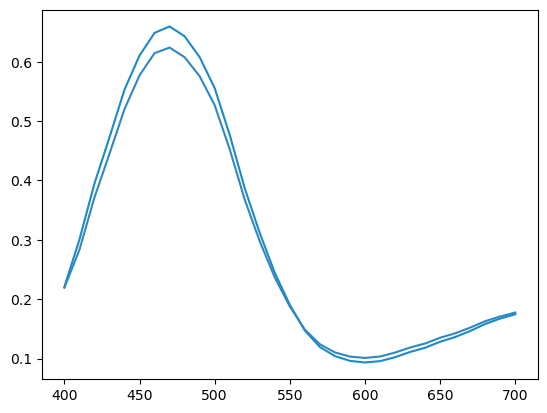

In [35]:
cijk["2000"].plot()
cppy["cyan"].plot()

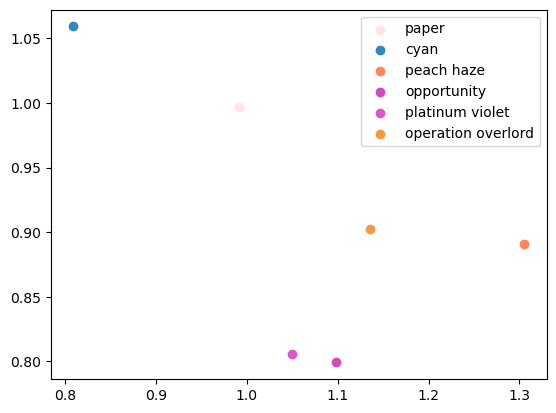

In [21]:
fig, ax = plt.subplots()

for name, spectra in cppy.items():
    s, m, q, l = tetrachromat.observe(spectra)
    x = q / m
    y = q / l
    ax.scatter(x, y, label=name, color=spectra.to_rgb())

ax.legend()
plt.show()

In [ ]:
fig2, ax2 = plt.subplots()

for name, spectra in all_inks.items():
    s, m, q, l = tetrachromat.observe(spectra)
    x = q / m
    y = q / l        
    ax2.scatter(x, y, color=spectra.to_rgb(), alpha=0.2)
    
    if x<1.15 and y < 0.75:
        print("magenta", end="\t")
        print(name)
    if x < 0.9 and y > 1.09:
        print("cyan", end="\t")
        print(name)
    if x > 1.35:
        print("orange", end="\t")
        print(name)
    if x> 1.3 and y < 0.8:
        print("pink", end="\t")
        print(name)
    if x > 1.1 and y > 0.97:
        print("yellow", end="\t")
        print(name)

for name, spectra in cppy.items():
    s, m, q, l = tetrachromat.observe(spectra)
    x = q / m
    y = q / l
    ax2.scatter(x, y, label=name, color=spectra.to_rgb(),  marker='*', s=100)
    
ax2.legend()
plt.show()

Based on this graph, I want to pick extreme values.

In [ ]:
extreme_cppy = [all_inks["Inkbara cyan"], all_inks["Momo pink"], all_inks["Rose cyclamen H"], all_inks["Noodler’s yellow"]]

In [ ]:
extreme_cppy_neug = load_neugebauer(extreme_cppy, cppy["paper"])
extreme_cppy_gamut = InkGamut(extreme_cppy_neug, illuminant=d50)

In [ ]:
extreme_cppy_gamut.get_width(tetrachromat, stepsize=0.025)

In [ ]:
cppy = [cmy_primaries_dict["100"], all_inks["Peach haze D"], all_inks["Opportunity"],all_inks["Operation overlord orange N"]]

In [ ]:
cppy_neug = load_neugebauer(cppy, cmy_primaries_dict["000"])
cppy_gamut = InkGamut(cppy_neug, illuminant=d50)

In [ ]:
cppy_gamut.get_width(tetrachromat, stepsize=0.025, save="cppy")

In [ ]:
cpvy = [cmy_primaries_dict["100"], all_inks["Peach haze D"], all_inks["Platinum violet"],all_inks["Operation overlord orange N"]]

In [ ]:
cpvy_neug = load_neugebauer(cpvy, cmy_primaries_dict["000"])
cpvy_gamut = InkGamut(cpvy_neug, illuminant=d50)

In [ ]:
cpvy_gamut.get_width(tetrachromat, stepsize=0.025, save="cppy")

## Jan 20

In [7]:
cijk_jan20 = {}
with open(f'012024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = ''.join(tuple(str(int(int(s) / 100)) for s in row[4].split(" ")))
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk_jan20[name] = spectra

In [8]:
cijk_jan20

{'0000': <spectra.Spectra at 0x292b29b10>,
 '0001': <spectra.Spectra at 0x103c71850>,
 '0010': <spectra.Spectra at 0x292ca3150>,
 '0011': <spectra.Spectra at 0x292c64950>,
 '0100': <spectra.Spectra at 0x292c64c90>,
 '0101': <spectra.Spectra at 0x292c64a10>,
 '0110': <spectra.Spectra at 0x292c657d0>,
 '0111': <spectra.Spectra at 0x292c658d0>,
 '1000': <spectra.Spectra at 0x292c64c50>,
 '1001': <spectra.Spectra at 0x292c64cd0>,
 '1010': <spectra.Spectra at 0x292c65890>,
 '1011': <spectra.Spectra at 0x292c649d0>,
 '1100': <spectra.Spectra at 0x292c65850>,
 '1101': <spectra.Spectra at 0x292c65b90>,
 '1110': <spectra.Spectra at 0x292c65810>,
 '1111': <spectra.Spectra at 0x292c64910>}

In [9]:
def km_primaries(inks, paper):
    num_inks = len(inks)
    primaries_dict = {'0' * num_inks: paper}

    for i in range(1, 2 ** num_inks):
        binary_str = format(i, f'0{num_inks}b')
        inks_to_mix = []

        for j, bit in enumerate(binary_str):
            if bit == '1':
                inks_to_mix.append(inks[j])

        if binary_str not in primaries_dict:  # should not need if statement
            mixed_ink = km_mix(inks_to_mix)
            primaries_dict[binary_str] = mixed_ink
    return primaries_dict

In [10]:
cijk_km = km_primaries([cijk_jan20["1000"], cijk_jan20["0100"], cijk_jan20["0010"], cijk_jan20["0001"]], cijk_jan20["0000"])

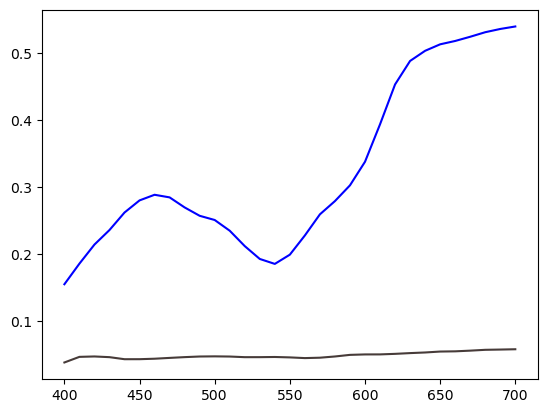

In [32]:
s = "1111"
(cijk_km[s]).plot(color='blue')
cijk_jan20[s].plot()

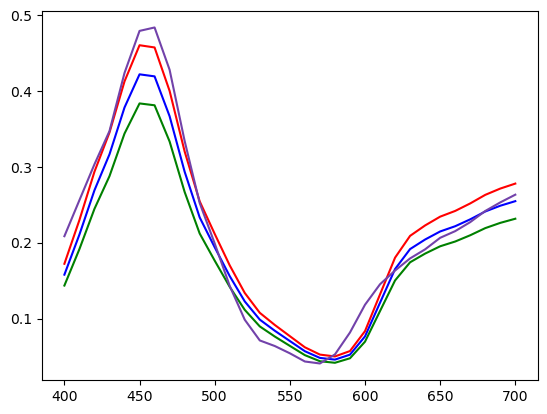

In [91]:
(1.1*cijk_km["1010"]).plot(color='blue')
(1.2*cijk_km["1010"]).plot(color='red')
(1*cijk_km["1010"]).plot(color='green')

(cijk_jan20["1010"]).plot()

In [95]:
1/1.1

0.9090909090909091

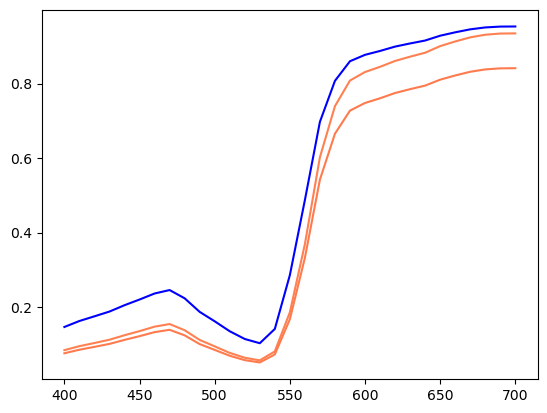

In [98]:
cijk_km["0100"].plot(color='blue')
(cijk_jan20["0100"]).plot()
(0.9 *cijk_jan20["0100"]).plot()

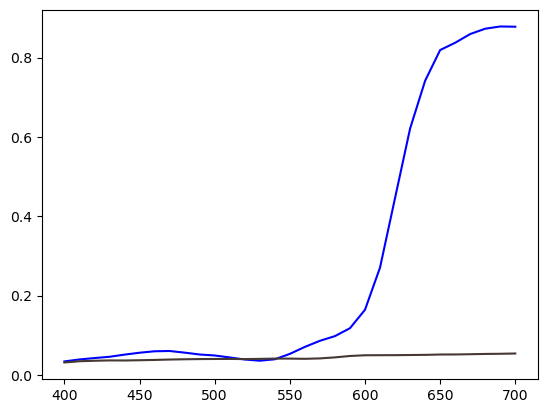

In [84]:
cijk_km["0111"].plot(color='blue')
cijk_jan20["0111"].plot()

In [45]:
cijk_nocell_neug = Neugebauer(cijk_nocell)
cijk_nocell_gamut_d50 = InkGamut(cijk_nocell_neug, illuminant=d50)

In [ ]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut_d50 = InkGamut(cijk_neug, illuminant=d50)

In [ ]:
cijk_gamut_d50.get_width(tetrachromat, stepsize=0.05)

In [ ]:
cijk_d50_buckets05 = cijk_gamut_d50.get_buckets(tetrachromat, stepsize=0.1)

In [ ]:
for d, (a,b) in cijk_d50_buckets05[:10]:
    print(round(d,4), end=",\t")
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])

In [ ]:
mets = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [ ]:
mets

## experiment if fucking around with percentages help (dot gain correction)

In [ ]:
mets['00 10 50 80'].plot(color='black')
cijk_gamut_d50.get_spectra((0, 0.1, 0.5, 0.8)).plot(color='grey')
cijk_gamut_d50.get_spectra((0, 0, 0.4, 0.70)).plot(color='red')

so dot gain correction clearly *should* be able to work

In [ ]:
mets['00 10 50 80'].plot()
cijk_gamut_d50.get_spectra((0, 0.1, 0.5, 0.8)).plot(color='red')
mets['20 80 00 40'].plot()
cijk_gamut_d50.get_spectra((0.2, 0.8, 0, 0.4)).plot(color='red')


cellular neug seems wrong, on a mathematical-senibilities-based level

In [ ]:
tetrachromat.observe(mets['00 10 50 80'])

In [ ]:
tetrachromat.observe(mets['20 80 00 40'])

In [ ]:
cijk_gamut_d50.get_spectra((0, 0.05, 0.65, 0.9)).plot()
mets['00 05 65 90'].plot(color='black')
cijk_gamut_d50.get_spectra((0.25, 1, 0, 0.1)).plot()
mets['25 100 00 10'].plot(color='black')

In [ ]:
tetrachromat.observe(cijk_gamut_d50.get_spectra((0, 0.05, 0.65, 0.9)))

In [ ]:
tetrachromat.observe(cijk_gamut_d50.get_spectra((0.25, 1, 0, 0.1)))

In [ ]:
tetrachromat.observe(mets['00 05 65 90']) 

In [ ]:
tetrachromat.observe(mets['25 100 00 10'])

plan:
1. remeasure metamers
2. remeasure "close" neu. primaries
3. determine if its a nix problem or a computation problem
4. call it a night

Step 1:

In [ ]:
mets

In [ ]:
mets2 = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets2": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets2[name] = spectra

In [ ]:
mets2['00 05 65 90'].plot()
mets['00 05 65 90'].plot()

In [ ]:
mets2['25 100 00 10'].plot()
mets['25 100 00 10'].plot()

Step 2:

In [40]:
cijk2 = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK2": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk2[name] = spectra

In [ ]:
measured_primaries = {}
for 

In [ ]:
cijk2['0011'].plot()
cijk2['0022'].plot()
cijk['0011'].plot()
cijk['0022'].plot()

In [ ]:
cijk2['0200'].plot()
cijk2['1200'].plot()
cijk['0200'].plot()
cijk['1200'].plot()

Step 3:
- definitely not a nix problem!
- so what's going on here? Is it just a computation bug? Is neugebauer flawed? many such questions. Might be worth playing around with the neugebauer number.. 

In [ ]:
cijk_neug.mix()


In [ ]:
def compare_spectra(spectra1: Spectra, spectra2: Spectra):
    return np.sum((spectra1.data() - spectra2.data()) ** 2)

In [ ]:
candidates =  [0.05, 0.1, 0.2, 0.3, 0.6, 0.8, 5, 10, 50, 1000]
n_rows = int(np.ceil(np.sqrt(len(candidates))))
n_cols = int(np.ceil(len(candidates) / n_rows))
fig, axs = plt.subplots(len(candidates),figsize=(15, 70))
if n_rows > 1:
    axs = axs.flatten()
for i, n in enumerate(candidates):
    for combo, spectra1 in zip([(25, 100, 0, 10)], [mets['25 100 00 10']]):

#     for combo, spectra1 in zip([(0, 5, 65, 90), (25, 100, 0, 10)], [mets['00 05 65 90'], mets['25 100 00 10']]):
        cijk_neug_n = CellNeugebauer(cijk, n=n)
        ink_gamut_n = InkGamut(cijk_neug_n)
        spectra2 = ink_gamut_n.get_spectra(np.array(combo) / 100)
        spectra2.plot(ax=axs[i])
        spectra1.plot(ax=axs[i], color='black')
        print(n, ", \t", round(compare_spectra(spectra1, spectra2), 3))
    axs[i].set_title(f'Plot for n = {n}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])
plt.show()

doesnt rlly seem to be the culprit idk

In [ ]:
cijk_neug_n1 = CellNeugebauer(cijk, n=1)
ink_gamut_n1 = InkGamut(cijk_neug_n1)

In [ ]:
mets['00 05 65 90'].plot(color='black')
cijk_gamut_d50.get_spectra((0, 0.05, 0.65, 0.9)).plot()
ink_gamut_n1.get_spectra((0, 0.05, 0.65, 0.9)).plot(color='green')
cijk_nocell_gamut_d50.get_spectra((0, 0.05, 0.65, 0.9)).plot(color='red')
# cijk['0011'].plot()
# cijk['0022'].plot()
# cijk['0012'].plot(color='cyan')
(0.5*cijk['0022'] + 0.5*cijk['0011']).plot()

what ees da culpreet here..
its not weighing heavily enough toward `0011`, its way more weighted toward `0022`
even a basic weighted average is closer 
whats the culprit here?
maybe take time to work this example lol


In [ ]:
mets['25 100 00 10'].plot(color='black')
cijk_gamut_d50.get_spectra((0.25, 1, 0, 0.1)).plot()
# ink_gamut_n1.get_spectra((0.25, 1, 0, 0.1)).plot(color='green')
# cijk_nocell_gamut_d50.get_spectra((0.25, 1, 0, 0.1)).plot(color='red')
# cijk['0200'].plot(color='grey')
# cijk['1200'].plot(color='grey')
# cijk['0012'].plot(color='cyan')
(0.33*cijk['0200'] + 0.33*cijk['1200'] + 0.33*cijk['1201']).plot(color='grey')

## Metamers

In [ ]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut_d50 = InkGamut(cijk_neug, illuminant=d50)

In [ ]:
cijk_gamut_d50_buckets10 = cijk_gamut_d50.get_buckets(tetrachromat, stepsize=0.1)

In [ ]:
for d, (a,b) in cijk_gamut_d50_buckets10[:10]:
    print(round(d,4), end=",\t")
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])